💻💉 Análise dos Resultados:

Importando bibliotecas e o DataFrame

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Obtive um valor de 5 linhas para 207 colunas, um dataset bem extenso. 

A primeira coluna é o nome 'id', o que deve significar identificador, as demais colunas apresentam nomes complexos para quem não é da área da biologia. Com uma busca rápida, descobri que esses nomes remetem aos mecanismos de ação dos medicamentos. Esses dados nos trazem a relação do mecanismo de ação do alvo com o remédio utilizado. 

Eu quero saber os valores dos dados que estão contidos na tabela.

In [3]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1], dtype=int64)

Os valores estão entre 0 e 1. Isto quer dizer que quando um mecanismo de ação é ativado, ele é indicado como 1, quando esse mecanismo de ação não é ativado, ele é detectado como 0.

É necessário saber se estou trabalhando com strings ou só com números. Para isto uso o comando .info()

In [4]:
dados_resultados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 207 entries, id to wnt_inhibitor
dtypes: int64(206), object(1)
memory usage: 37.6+ MB


Um dos resultados não é numérico. Para facilitar a manipulação, eu farei uma soma dos dados excluindo a coluna 'id', que possui dados diferentes de números em sua composição. 

In [5]:
contagem1 = dados_resultados.drop('id', axis=1).sum().sort_values(ascending=False)
contagem1

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

Percebe-se que este resultado ilustra uma informçação muito importante, que os inibidores estão no topo do resultado, e sendo assim, são os que possuem maior quantidade de resultados positivos. 

Verificarei se uma linha específica foi ativada em algum momento. E se foi, quantas vezes isto ocorreu. 

In [6]:
dados_resultados.drop('id', axis = 1).sum(axis = 1)

0        1
1        0
2        3
3        0
4        1
        ..
23809    1
23810    1
23811    0
23812    1
23813    0
Length: 23814, dtype: int64

Na primeira linha: uma única ativação. 
Na segunda:  nenhuma. 
Na terceira: três. 

No caso com 0, precisa-se verificar se foi um controle ou se realmente o medicamento não ativou nenhuma resposta.

In [8]:
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
import pandas as pd

dados = pd.read_csv('dados_experimentos.csv')
dados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


Na base de dados resultados não tem a informação que eu quero, referente ao tratamento.Tem-se apenas a coluna tratamento na base de dados inteira.
No tratamento só temos a coluna id, e os mecanismos de ação que foram ativados por aquela coluna.
É preciso mesclar estas duas informações.
Para isto, vaou criar duas novas colunas na base de dados resultado: n_contagem1(número de contagem1)

In [10]:
dados_resultados['n_contagem1'] = dados_resultados.drop('id', axis = 1).sum(axis = 1)

In [11]:
dados_resultados['n_contagem1'] != 0

0         True
1        False
2         True
3        False
4         True
         ...  
23809     True
23810     True
23811    False
23812     True
23813    False
Name: n_contagem1, Length: 23814, dtype: bool

Verifiquei se a coluna apresenta resultados diferentes de 0. Se for diferente, ela retorna a menssagem 'true', se for igual a 0 retorna 'false'.

In [12]:
dados_resultados['ativo_contagem1'] = (dados_resultados['n_contagem1'] != 0)
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor,n_contagem1,ativo_contagem1
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,True
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True


Vou mesclar as duas colunas com as informações que eu quero na base de dados de análises, utilizando o comando .merge.

In [13]:
dados_combinados = pd.merge(dados, dados_resultados[['id','n_contagem1', 'ativo_contagem1']], on = 'id')
dados_combinados.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99,n_contagem1,ativo_contagem1
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176,1,True
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371,0,False
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931,3,True
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154,0,False
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125,1,True


Para verificar se houve algum mecanismo de ativação, eu utilizei .query.

In [14]:
dados_combinados.query('tratamento == "com_controle"' )['ativo_contagem1'].value_counts()

False    1866
Name: ativo_contagem1, dtype: int64

Eu obtive como resposta 'false', isto quer dizer que com controle não tivemos nenhuma resposta com algum mecanismo de ação. 

In [15]:
dados_combinados.query('tratamento == "com_droga"' )['ativo_contagem1'].value_counts()

True     14447
False     7501
Name: ativo_contagem1, dtype: int64

Obtive como resposta 14447 tiveram mecanismos de ação, e aproximadamente 7500 não foram ativados.

Utilizando o boxplot da biblioteca do Seaborn, pode-se identificar a mediana e os quartir, entendendo como está a distribuição dos dados. 

<AxesSubplot:xlabel='droga', ylabel='g-0'>

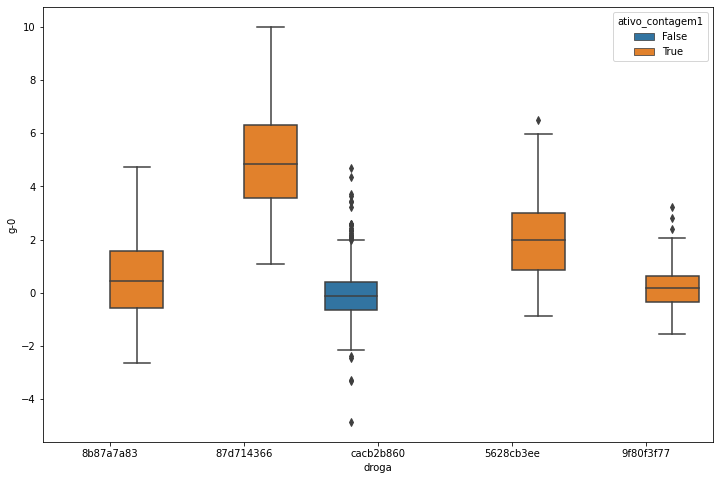

In [17]:
composto_principal = dados_combinados['droga'].value_counts().index[:5]
plt.figure(figsize=(12,8))
sns.boxplot(data = dados_combinados.query('droga in @composto_principal'), y = 'g-0', x = 'droga', hue = 'ativo_contagem1')

Realizando uma análise rápida, percebe-se que algumas categorias de compostos/drogas possuem mediana próximo à zero, outra com mediana próxima à 5 e outra próxima à 2. O terceiro boxplot em azul, referente à droga com_tratamento, está bem centrado. O último boxplot possui um comportamento muito semelhante ao terceiro, onde provavelmente a droga não alterou tanto assim o g-0.

🧠📤💻 Aprendizado de Máquina (Machine Learning):

O papel de um determinado modelo de Machine Learning é (para este estudo), a partir de todo esforço humano empenhado por vários anos para entender e tabular qual efeito de um composto quimíco em uma determinada expressão gênica, ser treinado e aprender, ou seja, ser capaz de produzir resultados compatíveis com aqueles feitos pelos(as) próprios(as) cientistas.

Existem diversos modelos de Machine Learning que podem ser aplicados para solucionar um único problema, porém são necessários testes para saber qual seria o melhor modelo à ser aplicado em determinada situação.

Iniciei com o modelo de Regressão Logística, modelo que está contido na biblioteca do Scikit - Learn.

Para a parte de Machine Learning, é necessário importar a biblioteca Scikit-Learn e dividir os dados em dois conjuntos:

- Teste; (Serve para verificação do aprendizado do modelo).
- Treino; (Onde o modelo vai aprender sobre os dados).

Realizando a divisão, utilizei a função do Scikit-Learn chamada 'train_teste_split'.

Para fazer a divisão da base de dados, é necessário definir qual será o nosso x e o nosso y. Neste estudo, o nosso y será ativo_contagem1 e, ele será definido a partir de uma assinatura(conjunto composto por 'g' + 'c' ou).

Tem-se:

x = dados_combinados.select_dtypes('float64'); (o tipo de dados é o float64)
y = dados_combinados['ativo_contagem1'];

O train_test_split foi definido como: x_treino, x_teste, y_treino, y_teste

A função terá como parâmetros:

train_test_split(x, y, test_size = 0.2)

X: base de dados definida como x (variáveis 'g' e 'c').
y: variável resposta (ativo_contagem1)
teste_size = 0.2 (0.2 é tamanho que defini para a base de testes, ou seja, a base de treino será composto pelos 80% dos dados restantes).

In [25]:
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_contagem1']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2)

Analisando a primeira Regressão Logística:

Primeiramente, eu defini o x, y e o x_treino, x_teste, y_treino, y_teste do train_test_split que eu usaria no modelo. Depois, dei um nome ao modelo (mod_rlog) e declarei a função .LogisticRegresssion(). O parâmetro max_inter  = 1000 foi adicionado ao modelo para que ele seja capaz de convergir para um resultado. 

Por último, ajustei o modelo com a função .fit(x_treino, y_treino), pois será através dessa base que o algoritmo aprenderá. 

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_contagem1'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376)

mod_rlog = LogisticRegression(max_iter = 1000)
mod_rlog.fit(x_treino, y_treino)
mod_rlog.score(x_teste, y_teste)

0.6264959059416334

Uma observação importante: Os modelos de regressão logística e DummyClassifier retornam um valor diferente cada vez que eu rodo eles. Isto acontece porque o train_test_split usa da base de dados um subconjuntos aleatórios de treino e teste, e com isso, toda vez que eu o executo, ele me retornará um resultado diferente. 

Caso eu queira mudar essa resposta, eu posso declarar o parâmetro random_state = n, o qual garantirá que a saída de todas as execuções será igual. 

Também posso usar .stratify. Observando aa divisão da variável ativo_contagem1, entre = True e = False, nota-se que se tem um balanceamento 60/40. E é do meu interesse que as bases de treino e teste sigam, além de uma divisão reprodutível (garantida com random_state), a proporção original do conjunto de dados. 

Portanto, eu atribuí stratify = coluna (que no caso deste projeto é Y e é dela que o stratify deve considerar a proporção 60/40), onde coluna = nome da coluna que o stratify deve levar em consideração a proporção de classes.

Como resultado, eu obtive uma acurácia de 0,6264, ou 62,64%. Pode-se concluir que o modelos está acertando 62%, aproximadamente, das previsões. 

Para saber se este valor é um bom valor de acurácia, eu optei por criar uma base comparativa, ou seja, testar um outro modelo para ver qual me fornecerá um melhor resultado. 

A biblioteca do Scikit-Learn já tem implementado alguns algoritmos que produzem modelos mais simples e que podem ser usados como base comparativa. 

Para este projeto, eu utilizei o DummyClassifier.

O processo de ajuste do modelo é muito parecido com o de regressão logística: eu dividi a base em treino e teste, defini um nome para o modelo, ajustei os dados de treino e no final verifiquei a acurácia do conjunto de testes.

In [27]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

modelo_dummy = DummyClassifier('most_frequent')
modelo_dummy.fit(x_treino, y_treino)
previsao_dummy = modelo_dummy.predict(x_teste)
accuracy_score(y_teste, previsao_dummy)

C:\Users\rsant\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass strategy=most_frequent as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


0.6067604450976275

Obtive como resultado uma acurácia de 0,6067 ou 60,67% pelo modelo de DummyClassifier. Por curiosidade, fiz um .value_counts normalizado e verifiquei que a proporção entre a classe 0 e a classe 1 é de 60/30, ou seja, o valor mais frequente representa 60% da base de dados. Conclui que caso o modelo "chutasse" a mesma classe para todos os eventos da base de testes, eu teria como resultado um acerto de 60% dos casos. 

In [28]:
dados_combinados['ativo_contagem1'].value_counts(normalize = True)

1    0.60666
0    0.39334
Name: ativo_contagem1, dtype: float64

Testei um novo modelo de ML: A Árvore de Decisão.

A sequência lógica para ajustar esse novo modelo é bem similar com a de Regressão Logística e DummyClassifier. Eu defini as bases x e y, fiz o train_test_split, declarei o novo modelo (utilizando a biblioteca do Scikit-Learn), ajustei e verifiquei a acurácia.

Pare este modelo de ML, utilizei o DecisionTreeClassifier. 
Um único parâmetro que declarei para esta função foi o max_depth = 3. Este parâmetro simboliza a profundade da árvore que eu criei, ou seja, a minha árvore terá 3 níveis de decisão a partir da raíz. 

In [29]:
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_contagem1'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376)

mod_arvore = DecisionTreeClassifier(max_depth = 3)
mod_arvore.fit(x_treino, y_treino)
mod_arvore.score(x_teste, y_teste)

0.6105395758975436

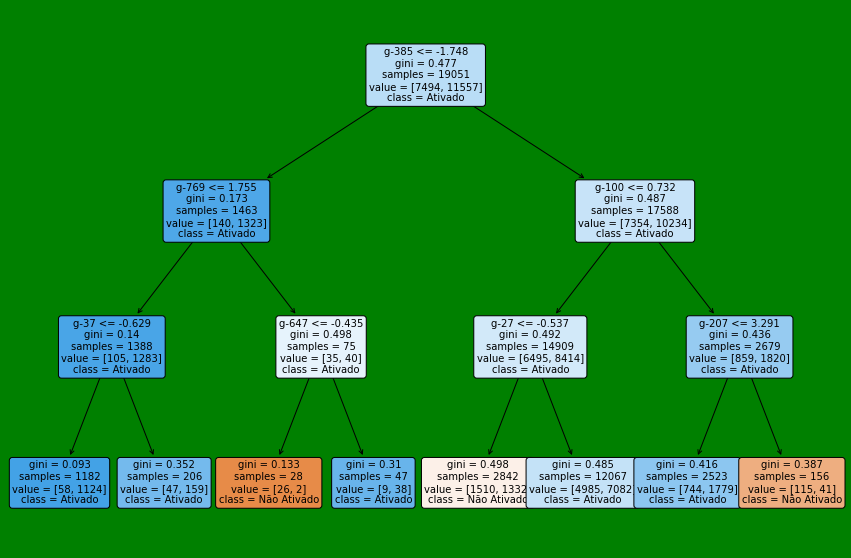

In [34]:
from sklearn import tree

fig, ax = plt.subplots(figsize = (15, 10), facecolor = 'g')
tree.plot_tree(mod_arvore, ax = ax, fontsize = 10, rounded = True, filled = True, feature_names = x_treino.columns,class_names = ['Não Ativado', 'Ativado'])

plt.show()

A figura é dividida em 4 níveis. 
O 1o. nível: é composto por apenas um quadro que é chamado de nó raíz. Ele tem como regras, os melhores atributos que podem dividir a nossa base de dados em dois conjuntos distintos (neste caso é o mecanismo ativado ou não ativado).

Entre o 1o. e 2o. Nível: existem duas setas (uma para a direita e outra para a esquerda). Elas são chamadas de ramos e subdividem o nível acima em dois outros conjuntos que separam novamente os dados em mecanismo de ação ativado ou não ativado, a partir de uma decisão.

O último nível da minha árvore de decisão, apresenta 'n' quadros que representam as características que são levadas em consideração na hora da classificação e elas se dividem em 'class = ativado' e 'class = não ativado'. 
Esse nível não apresenta mais ramificações, e por isto, estes quadros são chamados de folhas. 

Como o parâmetro max_depth foi setado com o valor 3, ele representa que nossa árvore terá 3 camadas de profundidade. 

Para melhorar o resultado que eu obtive do modelo de ML de Árvore de Decisões, eu vou criar um laço de repetição (loop) utilizando o for para que o modelo seja testado em repetição dentro e um determinado intervalor (range). 

Para facilitar, criarei os seguintes comandos: 

teste = []:  Lista criada para armazenar os resultado de acurácia obtidos nos dados de teste. 
treino =[]:  Lista criada para armazenar os resultado de acurácia obtidos nos dados de treino.

O loop: 

for i in range(1, 15): Condição que deve ser atendida 'i' e intervalor de valor 'range(1, 15)'

mod_arvore = DecisionTreeClassifier(max_depth = i): Modelo que será treinado e max_depth = i (onde a profundidade irá variar conforme o loop)

mod_arvore.fit(x_treino, y_treino): Ajuste do modelo a partir das bases de treino.

teste.append(mod_arvore.score(x_teste, y_teste)):  Armazenamento dos resultados de acurácia de teste na lista 'teste'.

treino.append(mod_arvore.score(x_treino, y_treino)): Armazenamento dos resultados de acurácia de teste na lista 'treino'.

In [37]:
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_contagem1'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376)

teste = []
treino = []

for i in range(1,15):
    mod_arvore = DecisionTreeClassifier(max_depth = i)
    mod_arvore.fit(x_treino, y_treino)
    teste.append(mod_arvore.score(x_teste, y_teste))
    treino.append(mod_arvore.score(x_treino, y_treino))

In [38]:
teste

[0.6067604450976275,
 0.6067604450976275,
 0.6105395758975436,
 0.6204073063195465,
 0.6212471131639723,
 0.6193575477640143,
 0.6212471131639723,
 0.6204073063195465,
 0.6157883686752047,
 0.6145286584085661,
 0.6092798656309049,
 0.5996220869200084,
 0.5973126180978375,
 0.6000419903422213]

In [39]:
treino

[0.6066348223190384,
 0.6066348223190384,
 0.6211222508004829,
 0.6360820954280615,
 0.6412261823526324,
 0.6489423127394888,
 0.6605427536612252,
 0.6707259461445594,
 0.689570101307018,
 0.7068395359823632,
 0.7294630203138943,
 0.7530313369376935,
 0.7769670883418194,
 0.7994331006246391]

Nota-se que enquantos os valores de acurácia do teste vão caindo, os valores de acurácia do treino vão aumentando. 

Para observar melhor esse fenômeno, eu plotei um gráfico combinando estas duas listas, utilizando a biblioteca do Seaborn. 

<AxesSubplot:>

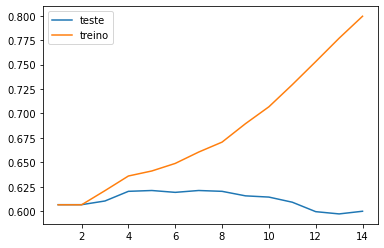

In [40]:
sns.lineplot(x = range(1,15), y = teste, label = 'teste')
sns.lineplot(x = range(1,15), y = treino, label = 'treino')

A primeira análise que pode ser feita é que, inicialmente, os valores de treino e teste são muito próximos mas, conforme vamos aumentando o intervalo (1 - 15), o valor de acurácia resultante para os dados do treino aumentam muito enquanto para os de teste vão caindo. 

Isto pode significar que, conforme eu aumento a profundidade (max_depth) da árvore de decisão, a classificação para os dados do treino ficam muito boas, pois desse modo é possível captar as características desses dados. Mas para o modelo de testes, ele não consegue generalizar tão bem e por conta disto, tem-se uma acurácia em queda. 

Esse tipo de comportamento em um determinado modelo com performance acima da média nos dados de treino e com queda nos dados de teste é chamado de overfitting.

In [47]:
from sklearn.tree import DecisionTreeClassifier

x = dados_combinados.select_dtypes('float64')
y = dados_combinados['ativo_contagem1'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376)

mod_arvore = DecisionTreeClassifier(max_depth = 10)
mod_arvore.fit(x_treino, y_treino)
mod_arvore.score(x_teste, y_teste)

0.612639093008608

Eu testei mais um modelo de ML chamado Random Forest. Este modelo cria várias árvores de decisões na qual ele considera amostras aleatórias do conjunto total. 

A função RandomForestClassifier() é a função que treina o modelo e ela não aceita variáveis no formato string. Sendo assim, eu preciso primeiramente fazer uma tratamento nas variáveis para depois utilizar o modelo. 

A função da Biblioteca Pandas pd.get_dummies(dados_combinados['tratamento']) vai pegar a coluna tratamento da base de dados_combinados e transformá-los em dados numéricos. Eu também fiz esse tratamento para 'dose' e 'tempo'. 

A função pd.get_dummies pega todas as categorias de uma variável (por exemplo: na variável tratamento, temos as categorias com_controle e com_droga). Sendo assim, se antes eu tinha uma coluna original com a marcação com_droga, agora ela vai apresentar o valor 0 na coluna com_controle e valor 1 na coluna com_droga, e o inverso é válido. 

In [49]:
pd.get_dummies(dados_combinados['tratamento'])

,com_controle,com_droga
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
23809,0,1
23810,0,1
23811,1,0
23812,0,1


In [50]:
pd.get_dummies(dados_combinados, columns = ['tratamento', 'dose', 'tempo'])

,id,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,...,c-99,n_contagem1,ativo_contagem1,tratamento_com_controle,tratamento_com_droga,dose_D1,dose_D2,tempo_24,tempo_48,tempo_72
0,id_000644bb2,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,...,0.4176,1,1,0,1,1,0,1,0,0
1,id_000779bfc,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,...,0.7371,0,0,0,1,1,0,0,0,1
2,id_000a6266a,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,...,0.6931,3,1,0,1,1,0,0,1,0
3,id_0015fd391,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,...,-0.8154,0,0,0,1,1,0,0,1,0
4,id_001626bd3,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,...,0.7125,1,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,...,0.4680,1,1,0,1,0,1,1,0,0
23810,id_fffb70c0c,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,-0.5565,...,0.3689,1,1,0,1,0,1,1,0,0
23811,id_fffc1c3f4,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,0.1745,...,0.3808,0,0,1,0,0,1,0,1,0
23812,id_fffcb9e7c,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,0.0463,...,0.0740,1,1,0,1,1,0,1,0,0


Como não são todos as variáveis que eu desejo utilizar no modelo de ML, exemplo:

'id', 'n_contagem1', 'ativo_contagem1', 'droga'.

Eu vou utilizar a função .drop para retirar as variáveis que eu não quero analisar na forma de uma lista e identifico-a como coluna através do parâmetro axis = 1. 

In [51]:
dados_combinados.drop(['id', 'n_contagem1', 'ativo_contagem1', 'droga'], axis = 1)

,tratamento,tempo,dose,g-0,g-1,g-2,g-3,g-4,g-5,g-6,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,com_droga,24,D1,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,com_droga,72,D1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,com_droga,48,D1,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,com_droga,48,D1,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,com_droga,72,D2,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,com_droga,24,D2,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,com_droga,24,D2,-1.3260,0.3478,-0.3743,0.9905,-0.7178,0.6621,-0.2252,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,com_controle,48,D2,0.3942,0.3756,0.3109,-0.7389,0.5505,-0.0159,-0.2541,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,com_droga,24,D1,0.6660,0.2324,0.4392,0.2044,0.8531,-0.0343,0.0323,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


In [52]:
from sklearn.ensemble import RandomForestClassifier

x = dados_combinados.drop(['id', 'n_contagem1', 'ativo_contagem1', 'droga'], axis = 1)
x = pd.get_dummies(x, columns =['tratamento', 'dose', 'tempo'])
y = dados_combinados['ativo_contagem1'] 
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 376)

mod_randomforest = RandomForestClassifier()
mod_randomforest.fit(x_treino, y_treino)
mod_randomforest.score(x_teste, y_teste)

0.6804534956959899

Obtive como resultado, uma acurácia de 68,04%, um pouco maior que a obtida pelo DummyClassifier. Porém, é válido dizer que apesar de ter melhorado a acurácia do modelo, talvez ele ainda não seja o suficiente para um determinado projeto. 

Ou seja, eu posso desenvolver um modelo de Machine Learning, mas ele pode não ser aplicável em determinadas situações/projetos porque o modelo ainda não traz ganho suficiente para sua implantação. 

Lembrando que, os modelos que eu utilize neste projeto, foram modelos simples e não me aprofundei em todos os pontos que podem ser modificados (variáveis e os parâmetros do modelo de ML) a fim de melhorar a otimização do modelo.